In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/skin_burn_dataset.zip"
extract_path = "/content/skin_burn_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted to:", extract_path)

✅ Dataset extracted to: /content/skin_burn_dataset


In [ ]:
import os

dataset_dir = "/content/skin_burn_dataset"

jpg_count = len([f for f in os.listdir(dataset_dir) if f.endswith(".jpg")])
txt_count = len([f for f in os.listdir(dataset_dir) if f.endswith(".txt")])

print("🖼️ JPG images:", jpg_count)
print("📝 TXT label files:", txt_count)
print("📦 Total files:", jpg_count + txt_count)

🖼️ JPG images: 1225
📝 TXT label files: 1441
📦 Total files: 2666


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

In [ ]:
label_map = {0: "First-degree", 1: "Second-degree", 2: "Third-degree"}

sorted_dir = "/content/burn_data_sorted"
os.makedirs(sorted_dir, exist_ok=True)

In [ ]:
# Create subfolders
for label_name in label_map.values():
    os.makedirs(os.path.join(sorted_dir, label_name), exist_ok=True)

In [ ]:
data = []
skipped = 0

In [ ]:
for file in os.listdir(dataset_dir):
    if file.endswith(".txt"):
        txt_path = os.path.join(dataset_dir, file)
        with open(txt_path, "r") as f:
            line = f.readline().strip()
            if line:
                class_id = int(line.split()[0])
                label_name = label_map[class_id]

                image_file = file.replace(".txt", ".jpg")
                image_path = os.path.join(dataset_dir, image_file)
                dst_path = os.path.join(sorted_dir, label_name, image_file)

                if os.path.exists(image_path):
                    shutil.copy(image_path, dst_path)
                    data.append({
                        "image_path": dst_path,
                        "label": class_id,
                        "label_name": label_name
                    })
                else:
                    skipped += 1

In [ ]:
# Save CSV
df = pd.DataFrame(data)
df.to_csv("/content/burn_dataset.csv", index=False)

In [ ]:
print(f"\nSorted folder: {sorted_dir}")
print(f" New CSV: /content/burn_dataset.csv")
print(f" Images processed: {len(df)}")
print(f" Skipped: {skipped} missing images")


✅ Sorted folder: /content/burn_data_sorted
✅ New CSV: /content/burn_dataset.csv
✅ Images processed: 1221
⚠️ Skipped: 216 missing images


In [ ]:
missing_files = []

for file in os.listdir(dataset_dir):
    if file.endswith(".txt"):
        img_file = file.replace(".txt", ".jpg")
        img_path = os.path.join(dataset_dir, img_file)
        if not os.path.exists(img_path):
            missing_files.append(img_file)

print(f"⚠️ Total missing .jpg files: {len(missing_files)}")
print("🔍 Sample missing files:", missing_files[:10])

⚠️ Total missing .jpg files: 216
🔍 Sample missing files: ['img976.jpg', 'img939.jpg', 'img874.jpg', 'img1203.jpg', 'img1037.jpg', 'img756.jpg', 'img1047.jpg', 'img1328.jpg', 'img1108.jpg', 'img1223.jpg']


/tmp/ipython-input-11-3416335481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_name', data=df, palette='viridis')


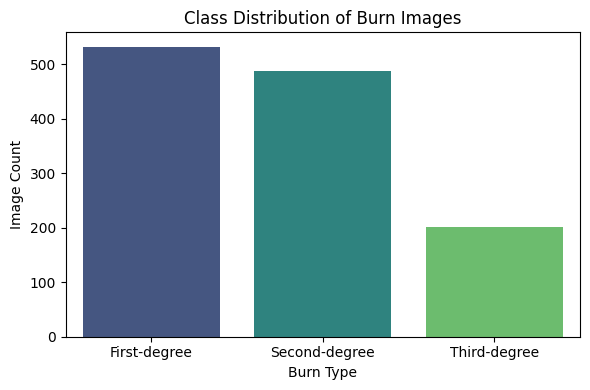

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label_name', data=df, palette='viridis')
plt.title("Class Distribution of Burn Images")
plt.xlabel("Burn Type")
plt.ylabel("Image Count")
plt.tight_layout()
plt.show()

In [ ]:
print("📊 Class distribution:")
print(df['label_name'].value_counts())

📊 Class distribution:
label_name
First-degree     532
Second-degree    488
Third-degree     201
Name: count, dtype: int64
